In [1]:
from google.colab import files
import io
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 600
import seaborn as sns
from matplotlib import ticker
from matplotlib import cm

In [2]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The summary statistics (including the KS statistics which will be used) are first imnported, both for the N=10^6 and N=10^5 scenarios 

In [3]:
dist_comps_1e6 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Summ_stats_dists/Dist_stats_all_Mut_SD_WGD.csv')
dist_comps_1e5 = pd.read_csv('/content/drive/My Drive/Redaction_SA/Final_figures_v2/Summ_stats_dists/Dist_stats_all_Mut_SD_WGD_1e5.csv')

In both cases, only the relevant values are kept:

In [4]:
KS_1e6 = dist_comps_1e6[(dist_comps_1e6['Comparison'] == 'WGD') & (dist_comps_1e6['Property'] != 'Divergence ratio') & (dist_comps_1e6['Type'] == 'All')].copy().reset_index(drop=True)
KS_1e5 = dist_comps_1e5[(dist_comps_1e5['Comparison'] == 'WGD') & (dist_comps_1e5['Property'] != 'Divergence ratio') & (dist_comps_1e5['Type'] == 'All')].copy().reset_index(drop=True)

In [5]:
KS_1e6 = KS_1e6[(KS_1e6['Model'] == 'Minimal')|(KS_1e6['Model'] == 'Mixed') & (KS_1e6['Mut_sigma'] == 0.025)].reset_index(drop=True)
KS_1e6 = KS_1e6[KS_1e6['Mut_sigma'] == 0.025].reset_index(drop=True)
KS_1e5 = KS_1e5[(KS_1e5['Model'] == 'Minimal')|(KS_1e5['Model'] == 'Mixed') & (KS_1e5['Mut_sigma'] == 0.075)].reset_index(drop=True)
KS_1e5 = KS_1e5[KS_1e5['Mut_sigma'] == 0.075].reset_index(drop=True)

In [6]:
# Replacing the 'Mixed' id by 'Cost-precision'
model_ids = {'Minimal': 'Minimal', 'Mixed': 'Precision-economy'}

for row in range(KS_1e6.shape[0]):
  KS_1e6.at[row, 'Model'] = model_ids[KS_1e6.at[row, 'Model']]

for row in range(KS_1e5.shape[0]):
  KS_1e5.at[row, 'Model'] = model_ids[KS_1e5.at[row, 'Model']]

In [7]:
# Df for each property
bm_vals_1e6 = KS_1e6[KS_1e6['Property'] == 'Transcription rate'].copy().reset_index(drop=True)
bp_vals_1e6 = KS_1e6[KS_1e6['Property'] == 'Translation rate'].copy().reset_index(drop=True)
prot_vals_1e6 = KS_1e6[KS_1e6['Property'] == 'Protein abundance'].copy().reset_index(drop=True)

bm_vals_1e5 = KS_1e5[KS_1e5['Property'] == 'Transcription rate'].copy().reset_index(drop=True)
bp_vals_1e5 = KS_1e5[KS_1e5['Property'] == 'Translation rate'].copy().reset_index(drop=True)
prot_vals_1e5 = KS_1e5[KS_1e5['Property'] == 'Protein abundance'].copy().reset_index(drop=True)

# Log10 of the p-values
bm_vals_1e6['KS_p-val'] = np.log10(bm_vals_1e6['KS_p-val'])
bp_vals_1e6['KS_p-val'] = np.log10(bp_vals_1e6['KS_p-val'])
prot_vals_1e6['KS_p-val'] = np.log10(prot_vals_1e6['KS_p-val'])

bm_vals_1e5['KS_p-val'] = np.log10(bm_vals_1e5['KS_p-val'])
bp_vals_1e5['KS_p-val'] = np.log10(bp_vals_1e5['KS_p-val'])
prot_vals_1e5['KS_p-val'] = np.log10(prot_vals_1e5['KS_p-val'])

Construction of the figure

In [8]:
# A function is defined to plot data with markers and colors for hue-levels
# without using seaborn

def hue_scatter(x, y, data, hue, palette, hue_order, markers, ax, size=None, 
                facecolors=None, alpha=None, linewidths=None):
  # Loop through hue orders and plot the points
  for level in hue_order:
    subset = data[data[hue] == level].copy().reset_index(drop=True)

    if facecolors == 'none':
      ax.scatter(subset[x], subset[y], s=size,
                 marker=markers[level], alpha=alpha, linewidths=linewidths,
                 label=level, facecolors=facecolors, edgecolors=palette[level])
      
    else:
      ax.scatter(subset[x], subset[y], s=size, c=palette[level],
                 marker=markers[level], alpha=alpha, linewidths=linewidths,
                 label=level, facecolors=facecolors)

In [9]:
# Adding new coordinates with jitter to the dataframes of Mood's
# p-values and KS statistics

# Numerical coordinates
sym_to_num = {0.5:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8,
              8:9, 9:10, 10:11}
for row in range(bm_vals_1e6.shape[0]):
  bm_vals_1e6.at[row, 'num'] = sym_to_num[bm_vals_1e6.at[row, 'Mut_ratio']]
for row in range(bm_vals_1e5.shape[0]):
  bm_vals_1e5.at[row, 'num'] = sym_to_num[bm_vals_1e5.at[row, 'Mut_ratio']]

for row in range(bp_vals_1e6.shape[0]):
  bp_vals_1e6.at[row, 'num'] = sym_to_num[bp_vals_1e6.at[row, 'Mut_ratio']]
for row in range(bp_vals_1e5.shape[0]):
  bp_vals_1e5.at[row, 'num'] = sym_to_num[bp_vals_1e5.at[row, 'Mut_ratio']]

for row in range(prot_vals_1e6.shape[0]):
  prot_vals_1e6.at[row, 'num'] = sym_to_num[prot_vals_1e6.at[row, 'Mut_ratio']]
for row in range(prot_vals_1e5.shape[0]):
  prot_vals_1e5.at[row, 'num'] = sym_to_num[prot_vals_1e5.at[row, 'Mut_ratio']]

# Add jitter
def jitter(x):
  return x + np.random.uniform(-0.1, 0.1)

bm_vals_1e6['num'] = bm_vals_1e6['num'].apply(lambda x: jitter(x))
bp_vals_1e6['num'] = bp_vals_1e6['num'].apply(lambda x: jitter(x))
prot_vals_1e6['num'] = prot_vals_1e6['num'].apply(lambda x: jitter(x))

bm_vals_1e5['num'] = bm_vals_1e5['num'].apply(lambda x: jitter(x))
bp_vals_1e5['num'] = bp_vals_1e5['num'].apply(lambda x: jitter(x))
prot_vals_1e5['num'] = prot_vals_1e5['num'].apply(lambda x: jitter(x))

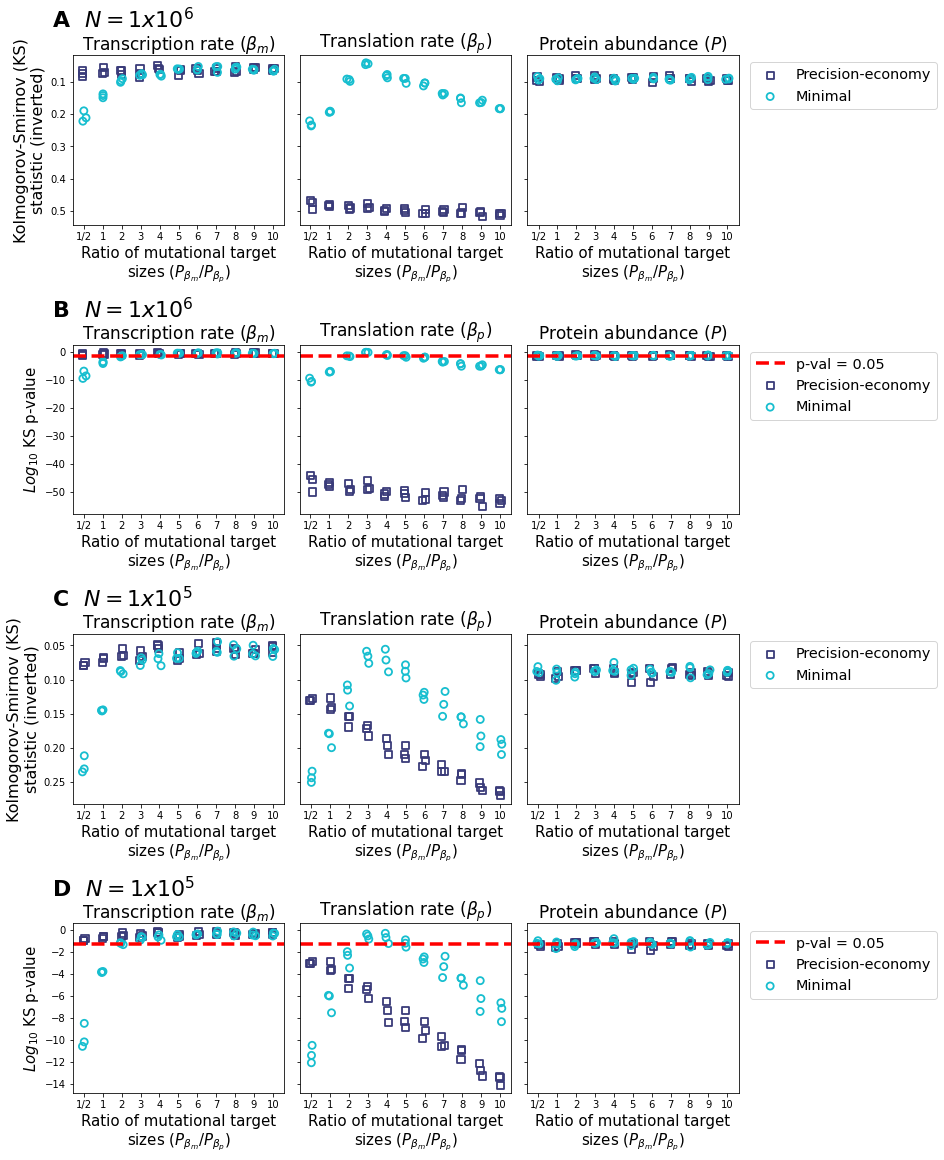

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(13, 16), constrained_layout=True,
                        sharey='row')

# Parameters for the scatterplots
labels = ['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

size = 50

palette = {'Precision-economy': cm.tab20b.colors[0],
           'Minimal': cm.tab10.colors[9]}
hue_order = ['Precision-economy', 'Minimal']
markers = {'Precision-economy': 's', 'Minimal':'o'}

facecolors = 'none'

linewidths = 1.8

# 1) Swarmplots of Ks statistics for N = 10^6

scatter1 = hue_scatter('num', 'KS_stat', bm_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[0,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[0,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[0,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter2 = hue_scatter('num', 'KS_stat', bp_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[0,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[0,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[0,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter3 = hue_scatter('num', 'KS_stat', prot_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[0,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[0,2])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[0,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

axs[0,2].invert_yaxis()


# 2) Swarmplots of p-values for N = 10^6
scatter5 = hue_scatter('num', 'KS_p-val', bm_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[1,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[1,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter6 = hue_scatter('num', 'KS_p-val', bp_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[1,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[1,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter7 = hue_scatter('num', 'KS_p-val', prot_vals_1e6, 'Model', palette, 
                      hue_order, markers, axs[1,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[1,2]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[1,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

# 3) Swarmplots of Ks statistics for N = 10^5

scatter9 = hue_scatter('num', 'KS_stat', bm_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[2,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[2,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[2,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter10 = hue_scatter('num', 'KS_stat', bp_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[2,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[2,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[2,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter11 = hue_scatter('num', 'KS_stat', prot_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[2,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[2,2]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[2,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

# Invert the axes
axs[2,0].invert_yaxis()

# 4) Swarmplots of p-values for N = 10^5

scatter13 = hue_scatter('num', 'KS_p-val', bm_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[3,0], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[3,0]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[3,0].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter14 = hue_scatter('num', 'KS_p-val', bp_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[3,1], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[3,1]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[3,1].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

scatter15 = hue_scatter('num', 'KS_p-val', prot_vals_1e5, 'Model', palette, 
                      hue_order, markers, axs[3,2], size=size, 
                      facecolors=facecolors, linewidths=linewidths)

plt.sca(axs[3,2]) 
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axs[3,2].set_xticklabels(['1/2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

# Line at p=0.05
for ax in [axs[1,0], axs[1,1], axs[1,2], 
           axs[3,0], axs[3,1], axs[3,2]]:

  ax.axhline(y=np.log10(0.05), c='red', linestyle='--', label='p-val = 0.05',
             linewidth=3.5)

# Add legends
axs[0, 2].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')
axs[1, 2].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')
axs[2, 2].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')
axs[3, 2].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='x-large')


# Axes labels for all
for ax in [axs[0,0], axs[0,1], axs[0,2],
           axs[1,0], axs[1,1], axs[1,2],
           axs[2,0], axs[2,1], axs[2,2],
           axs[3,0], axs[3,1], axs[3,2],]:
  ax.set_xlabel(r"Ratio of mutational target" "\n" r"sizes ($P_{\beta_m}$/$P_{\beta_p}$)", 
                fontsize=15)
  ax.set_ylabel('')

axs[0,0].set_ylabel("Kolmogorov-Smirnov (KS)\nstatistic (inverted)", fontsize=16)
axs[1,0].set_ylabel(r"$Log_{10}$ KS p-value", fontsize=15)

axs[2,0].set_ylabel("Kolmogorov-Smirnov (KS)\nstatistic (inverted)", fontsize=16)
axs[3,0].set_ylabel(r"$Log_{10}$ KS p-value", fontsize=15)

# Plot titles
axs[0,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=17)
axs[0,1].set_title(r"Translation rate ($\beta_p$)", fontsize=17)
axs[0,2].set_title(r"Protein abundance ($P$)", fontsize=17)

axs[1,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=17)
axs[1,1].set_title(r"Translation rate ($\beta_p$)", fontsize=17)
axs[1,2].set_title(r"Protein abundance ($P$)", fontsize=17)

axs[2,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=17)
axs[2,1].set_title(r"Translation rate ($\beta_p$)", fontsize=17)
axs[2,2].set_title(r"Protein abundance ($P$)", fontsize=17)

axs[3,0].set_title(r"Transcription rate ($\beta_m$)", fontsize=17)
axs[3,1].set_title(r"Translation rate ($\beta_p$)", fontsize=17)
axs[3,2].set_title(r"Protein abundance ($P$)", fontsize=17)

# Add subfigures A and B identifiers
axs[0,0].annotate(r"A  $N = 1 x 10^6$", (-0.1, 1.16), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

axs[1,0].annotate(r"B  $N = 1 x 10^6$", (-0.1, 1.16), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

axs[2,0].annotate(r"C  $N = 1 x 10^5$", (-0.1, 1.16), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

axs[3,0].annotate(r"D  $N = 1 x 10^5$", (-0.1, 1.16), xycoords='axes fraction', 
                      fontsize=22, fontweight='bold')

FigS7 = plt.gcf()
FigS7.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/FigS7.tiff', bbox_inches='tight')
#FigS7.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/FigS7.pdf', bbox_inches='tight')